### umapした結果をエディットしたい

In [2]:
def readNodesFromVectorFile(vec_file, delimiter=' '):
    nodes = []
    with open(vec_file, 'r') as f:
        reader = csv.reader(f, delimiter=delimiter)
        for i, row in enumerate(reader):
            if i == 0:
                # header line
                h_row = row
                continue
            else:
                node = row[0]
                vec = row[1:-1]
                nodes.append(node)
            pass
    return nodes

In [3]:
vecfile="../res01sample_linkprd_new_sel_normalized/non_allotherpp_vec_0_2st_3G_0.05_wo_norm_until2013.txt"

In [6]:
import numpy as np
nodes = np.load("nodes.npy")
labels = np.load("kmeanslabels.npy")
embedding = np.load("umap_res.npy")
embedding.shape
print(len(nodes))

2539629


In [7]:
def calcCentroids(labels,embedding):
    labelkey,labelcounts = np.unique(labels,return_counts=True)
    sum_mtx = np.zeros((len(labelkey),embedding.shape[1]),dtype=float)
    for i in range(embedding.shape[0]):
        label = labels[i]
        sum_mtx[label,:] += embedding[i,:]
    
    for label in labelkey:
        sum_mtx[label,:] /= labelcounts[label]
        
    return sum_mtx

In [8]:
centroids = calcCentroids(labels,embedding)
centroids

array([[-1.49449164,  2.12436461],
       [-3.52790847,  1.74824212],
       [ 5.17195903, -1.05300635],
       [-3.12491803,  3.40113375],
       [-1.18778351,  0.88648739],
       [ 0.67635206, -0.61469841],
       [-0.88415237, -0.23260474],
       [-1.46147267,  1.01655403],
       [ 3.33292787, -2.0481778 ],
       [ 2.19073275,  0.01318791],
       [-0.10431911, -0.861653  ],
       [ 4.06429062, -2.71823097],
       [-1.32204724, -1.78906768],
       [-1.4853748 ,  6.88642549],
       [-0.98748301, -0.09703049],
       [ 1.27881484, -0.89742879],
       [-0.54013364,  0.76014877],
       [ 2.98405693, -3.33004614],
       [-2.96881673,  1.95002062],
       [-1.68406518,  2.38235925]])

In [9]:
def readAuthorCSV(a_file):
    auDic = cl.defaultdict(str)
    with open(a_file, 'r') as f:
         reader = csv.reader(f)
         for row in reader:
             aid = row[0]
             name = ' '.join(row[1:])
             b_name = auDic[aid]
             if len(name) > len(b_name):
                 auDic[aid] = name

    return auDic

def readInstitutionCSV(a_file):
    inDic = cl.defaultdict(str)
    with open(a_file, 'r') as f:
         reader = csv.reader(f)
         for row in reader:
             affid = row[0]
             name = ' '.join(row[1:])
             b_name = inDic[affid]
             if len(name) > len(b_name):
                 inDic[affid] = name

    return inDic

def readJournalCSV(a_file):
    jnDic = cl.defaultdict(str)
    with open(a_file, 'r') as f:
         reader = csv.reader(f)
         for row in reader:
             jid = row[0]
             name = ' '.join(row[1:])
             b_name = jnDic[jid]
             if len(name) > len(b_name):
                 jnDic[jid] = name

    return jnDic

def readPaperDescsCSV(a_file):
    ptDic = cl.defaultdict(str)
    with open(a_file, 'r') as f:
         reader = csv.reader(f)
         for row in reader:
             pid = row[0]
             title = row[1]
             b_title = ptDic[pid]
             if len(title) > len(b_title):
                 ptDic[pid] = title

    return ptDic

In [10]:
authorfile = "../../scopus_xml_scraper/csv01/authors.csv"
institutionfile = "../../scopus_xml_scraper/csv01/institutions.csv"
journalfile = "../../scopus_xml_scraper/csv01/journals.csv"
paperdescfile = "../../scopus_xml_scraper/csv01/paperdescs.csv"
import collections as cl

In [11]:
import csv
auDic = readAuthorCSV(authorfile)
inDic = readInstitutionCSV(institutionfile)
jnDic = readJournalCSV(journalfile)
ptDic = readPaperDescsCSV(paperdescfile)
allDics = [auDic,inDic,jnDic,ptDic]
allDic = {}
allDic.update(auDic)
allDic.update(inDic)
allDic.update(jnDic)
allDic.update(ptDic)

In [12]:
list(auDic.values())[0:20]


['Robert Meadows',
 'Olga I. Moskalenko',
 'Chang-Yong Liang',
 ' García-Torales',
 'Athanasios Kostopoulos',
 'Ioannis G. Mikellides',
 'Chiitang Tsai',
 'Yohei Ishida',
 'Stephen C. Cook',
 'Wee Han Ang',
 'Lijuan Jiao',
 'Aleksandras Vytautas Rutkauskas',
 'Andrew D. Boyd',
 'Alegra A. Eroy-Reveles',
 'Xia Ping Chen',
 ' Nurgaliev',
 'Shi-Cheng Zhang',
 ' Årsand',
 'Sarang S. Dalal',
 'Roeland M.H. Merks']

In [13]:
for a_key,a_val in auDic.items():
    if a_val == "Tsutomu Miyasaka":
        print(a_key)

55583007300
7103258726


In [14]:
list(inDic.values())[0:20]


['The University of Agriculture pak',
 'Ajinomoto-Genetika Research Institute rus',
 'Ariake National College of Technology jpn',
 'Center for Technology Assessment usa',
 "Cook Children's Medical Center usa",
 'NIA usa',
 'MEMC Electronic Materials, Inc. usa',
 'Takeda General Hospital jpn',
 'Cooper Union usa',
 'Nishi-Niigata Chuo National Hospital jpn',
 'Tomakomai National College of Technology jpn',
 'Wakayama College of Technology jpn',
 'Faculte de Pharmacie fra',
 'Shanghai Universtity of Electric Power chn',
 'Centre Hospitalier lux',
 'Ltd. jpn',
 'Device Functional Analysis Department, NISSAN ARC Ltd jpn',
 'Mayo Mail Code 715 usa',
 "Dipartimento di Fisica, Universita'Di Pisa ita",
 'Center for Applied Biodiversity Science, Conservation International usa']

In [15]:
list(jnDic.values())[0:20]

['Journal of Business Economics and Management',
 'Dermatologia Kliniczna',
 'Indian Journal of Plastic Surgery',
 'Business: Theory and Practice',
 'Journal of Field Archaeology',
 'Proceedings of the ASME Turbo Expo',
 'Proceedings of the Spring Technical Conference of the ASME Internal Combustion Engine Division',
 'Applied Ecology and Environmental Research',
 'Proceedings of the Institute of Navigation, National Technical Meeting',
 'SPE Production and Operations Symposium, Proceedings',
 'Proceedings of the International Symposium on Power Semiconductor Devices and ICs',
 'Journal of China University of Mining and Technology',
 'Revue Francophone des Laboratoires',
 'Current Sociology',
 'IEEE/OSA Journal of Display Technology',
 'Journal of Competition Law and Economics',
 'CESifo Economic Studies',
 'Istanbul University - Journal of Electrical and Electronics Engineering',
 'Milan Journal of Mathematics',
 'Journal of Business Finance and Accounting']

In [16]:
list(ptDic.values())[0:20]

['Parallel processing solves the DTV format conversion problem',
 'Using steady-state equations for transient flow calculations in natural gas pipelines.',
 'Pipeflow analysis.',
 'Use pressure gage to measure flow.',
 'Dunkirk aims for the big ships.',
 'PHYSICAL AND ELECTRICAL DEGRADATION OF PHOTOVOLTAIC MODULES AFTER EXPOSURE IN TERRESTRIAL ENVIRONMENTS.',
 'RECENT ADVANCES IN REDOX FLOW CELL STORAGE SYSTEMS.',
 'DYNAMIC SIMULATION OF A SODIUM-COOLED, ADVANCED CENTRAL RECEIVER SOLAR-ELECTRIC POWER PLANT.',
 'WEIGHT MINIMIZATION OF SANDWICH TYPE SOLAR COLLECTOR PANELS.',
 'PERFORMANCE OF THE MEAD, NEBRASKA, 25 kWP PHOTOVOLTAIC SOLAR ENERGY SYSTEM AND COMPARISON WITH SIMULATION.',
 'HIGH TEMPERATURE, LOW MASS SOLAR BLANKET DEVELOPMENT.',
 'COMBINED PHOTOVOLTAIC/THERMAL ELECTRIC CENTRAL POWER PLANT.',
 'ORBITAL ANTENNA FARM POWER SYSTEMS CHALLENGES.',
 'INTELSAT V POWER CONTROL ELECTRONICS SYSTEM.',
 'ENVIRONMENTAL TESTING OF TERRESTRIAL FLAT PLATE PHOTOVOLTAIC MODULES.',
 'RESULTS FRO

In [17]:
def getNearestNid(nodes,embedding,allDics,labels,centroids):
    if len(nodes) == 0:
        return None

    near_nodes = []
    indices = []
    for i, centroid in enumerate(centroids):
        print(centroid)
        distances = calcCosDistance(embedding,centroid)
        s_indices = distances.argsort()
        print("cluster %d"%(i+1))
        counter = 0
        for a_dic in allDics:
            for idx in s_indices:
                nid = nodes[idx]
                label = labels[idx]
                if i == label and nid in a_dic.keys():
                    counter += 1
                    node_name = a_dic[nid]
                    print(node_name)
                    near_nodes.append(node_name)
                    indices.append(idx)
                    break
            
    return near_nodes,indices

In [18]:
def calcCosDistance(vecs,centroid):
    vecs_norm = vecs / np.linalg.norm(vecs, axis=1)[:,np.newaxis]
    centroid_norm = centroid / np.linalg.norm(centroid)
    distances = 1.0 - np.dot(vecs_norm, centroid_norm.T)
    return distances

In [19]:
#near_nodes, indices = getNearestNid(nodes,embedding,allDics,labels,centroids)

In [20]:
# hindex, impactfactor,natureindexのトップ１０
sel_nodes = [
"35463345800",
"7005851690",
"35461776200",
"35463772200",
"55701772900",
"7006192717",
"36079308900",
"34668149000",
"56401622800",
"7004044501",
"5700165152"
"23571",
"5200152704",
"20497",
"17854",
"22657",
"22687",
"19881",
"24769",
"22680",
"60022195",
"60029241",
"60012708",
"60028186",
"60019499",
"60026851",
"60031101",
"60030451",
"60025038",
"60016849",
]

In [21]:
sel_nodes = np.load("sel_nodes.npy")
sel_nodes = np.append(sel_nodes, ["perovskite","55583007300", "7103258726", "60025272","60103898","60103900","60103904"])
sel_nodes

array(['6603903848', '7102645896', '35405771500', '35463345800',
       '56597035200', '15047173000', '7004071742', '7201385673',
       '36012928800', '7404011639', '15751945400', '35554004500',
       '7201718070', 'composites', 'nanocomposites', 'gan', 'ingan',
       'brain', 'neurons', 'tio', 'organic', 'silicon', 'a-si', 'social',
       'management', 'design', 'ghz', 'sul', 'phosphatidylglycerol',
       'genes', 'expression', 'plant', 'species', 'networks',
       'synchronization', 'cancer', 'skin', 'wireless', 'sensor',
       'complexes', 'coordination', 'power', 'system', 'gene',
       'biological', 'heat', 'thermal', 'protein', 'proteins', 'thin',
       'cigs', 'carbon', 'catalyst', '60016521', '60021170', '60017994',
       '60102074', '60025063', '60006288', '60025578', '60012259',
       '60032724', '60004156', '60016809', '60015023', '60016930',
       '60001298', '60021227', '60012981', '60016087', '60023691',
       '60028333', '60015742', '15995', '28132', '16764'

Brian L. Wardle
James S. Speck
Edward T. Bullmore
Michael Graätzel
Jozef Poortmans
Jian Mei Yang
Riidiger Quay
Heng-Lin Cui
 Guan Rong Chen
Wei-Yin Sun
Sundaram Suresh
Martin Andrew Green
Dang Sheng Su
composites
nanocomposites
gan
ingan
brain
neurons
tio
organic
silicon
a-si
social
management
design
ghz
sul
phosphatidylglycerol
genes
expression
plant
species
networks
synchronization
cancer
skin
wireless
sensor
complexes
coordination
power
system
gene
biological
heat
thermal
protein
proteins
thin
cigs
carbon
catalyst
Composites Science and Technology
Journal of Applied Physics
Journal of Physical Chemistry C
Advanced Materials Research
PloS one
Plant Physiology
BMC bioinformatics
Solar Energy
Journal of Biological Chemistry
International Journal of Hydrogen Energy
perovskite
Tsutomu Miyasaka
The University of Tokyo
The University of Tokyo
[2156363, 2206221, 1924997, 1926374, 2076780, 49834, 2174028, 2211056, 1936843, 2228507, 53579, 1928248, 2212634, 2308942, 2420537, 2353818, 2377248,

57

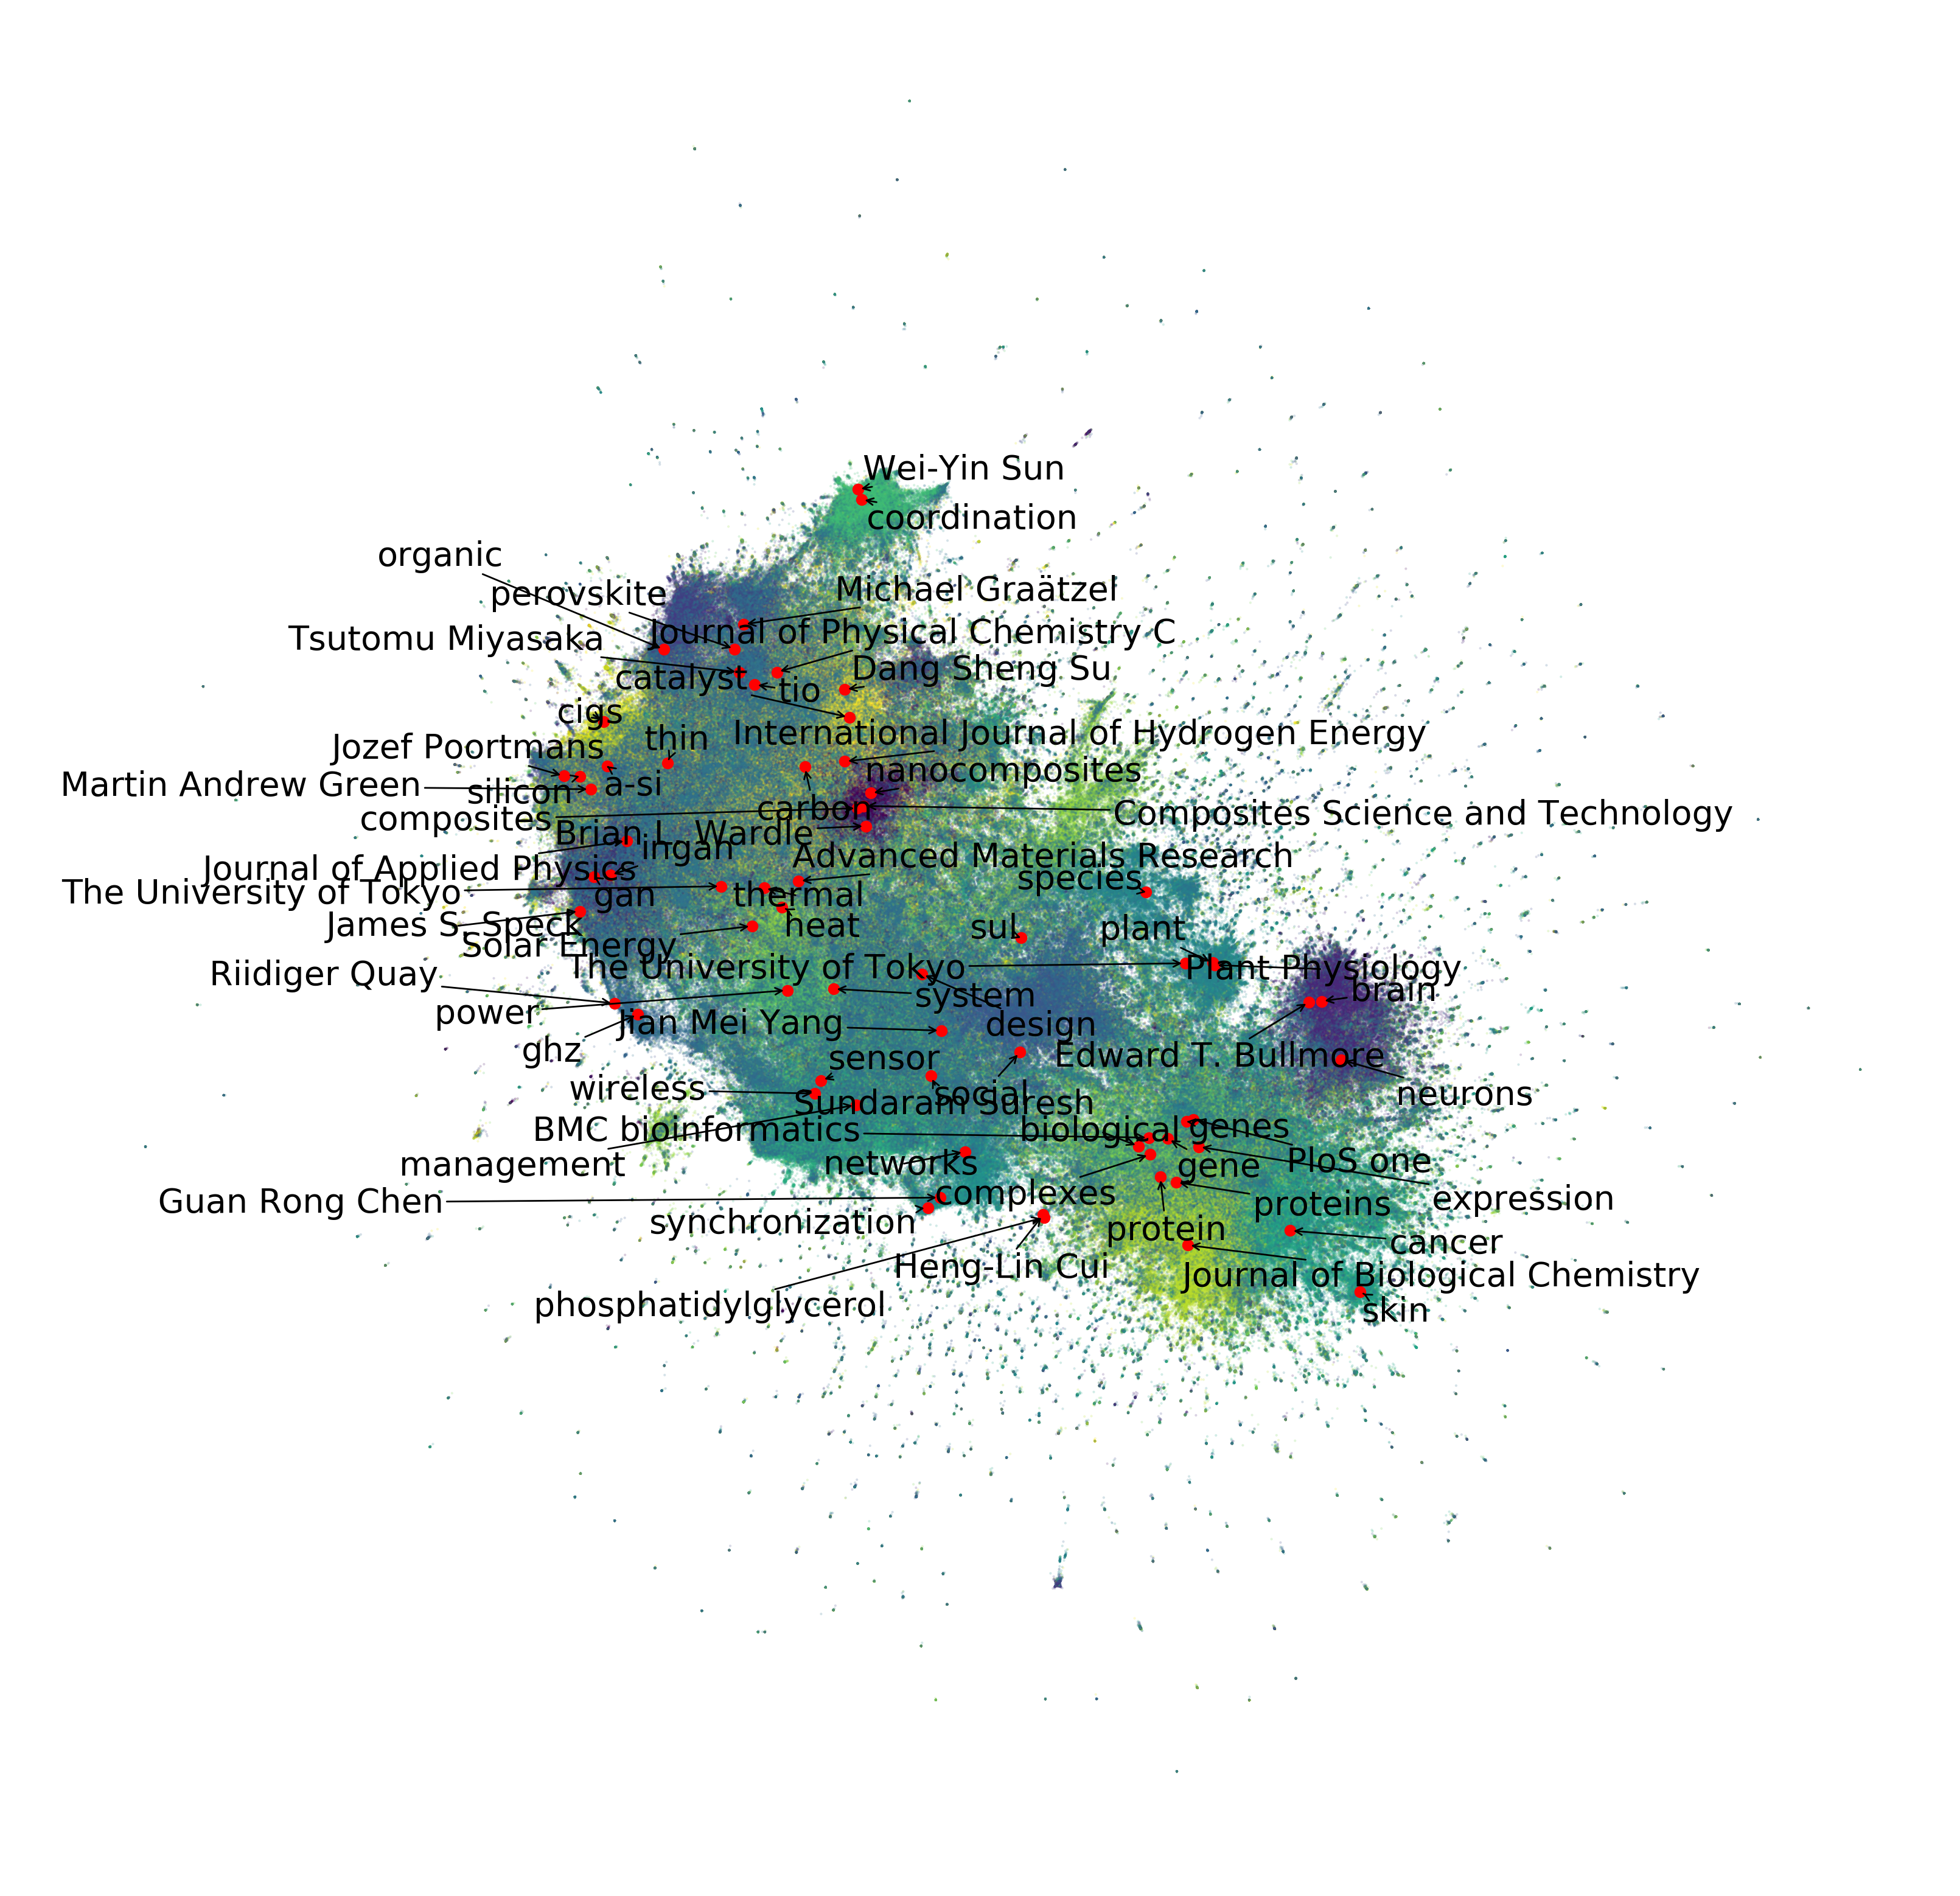

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import adjustText as at

fig = plt.figure(figsize=(20,20),dpi=200)
plt.scatter(embedding[:,0], embedding[:,1],s=1,c=labels,alpha=0.2,marker='.')
#plt.title("This is a title")
#plt.xlabel("x axis")
#plt.ylabel("y axis")
plt.axis("off")
ts =[]
indices = []
for i, nid in enumerate(sel_nodes):
    idx_array = np.where(nodes==nid)[0]
    if len(idx_array) == 0:
        continue
        
    idx = idx_array[0]
#    print(idx[0][0])
#    idx = nodes.index(nid)
    if nid in allDic.keys():
        n_name = allDic[nid]
        if len(n_name) > 50:
            if "The University of Tokyo" in n_name:
                n_name = "The University of Tokyo"
            elif "Miyasaka" in n_name:
                print(n_name)
                pass
            else:
                continue
    else:
        n_name = nid
        
    print(n_name)
    plt.plot(embedding[idx,0],embedding[idx,1],color='red',marker='o')
    indices.append(idx)
    ts.append(plt.annotate(n_name,xy=(embedding[idx,0],embedding[idx,1]),size=20,color="black"))

print(indices)
at.adjust_text(ts, x=embedding[indices,0], y=embedding[indices,1], force_points=0.1, arrowprops=dict(arrowstyle='->', 
color='black'))

#for i,n_name in enumerate(near_nodes):
#    idx = indices[i]
#    print(n_name)
#    plt.plot(embedding[idx,0],embedding[idx,1],color='red',marker='o')
#    plt.annotate(n_name,xy=(embedding[idx,0],embedding[idx,1]),size=20)
#    
#for i in range(centroids.shape[0]):
#    plt.plot(centroids[i,0],centroids[i,1],color='blue',marker='x')

#for auid in authors:
#    name = auDic[auid]
#    print(name)
#    idx = nodes.index(auid)
#    plt.annotate(name,xy=(embedding[idx,0],embedding[idx,1]),size=20)
#
#for inid in institutions:
#    name = inDic[inid]
#    shortname = ','.join(list(name.split(', '))[-1:])
#    print(shortname)
#    idx = nodes.index(inid)
#    plt.annotate(shortname,xy=(embedding[idx,0],embedding[idx,1]),size=20)
#    
#for jnid in journals:
#    name = jnDic[jnid]
#    print(name)
#    idx = nodes.index(jnid)
#    plt.annotate(name,xy=(embedding[idx,0],embedding[idx,1]),size=20)

#plt.grid(True)
#fig.savefig('embvis.pdf')

In [24]:
fig.savefig('embvisDegBalanced.pdf')

In [25]:
fig.savefig('embvisDegBalanced.eps')

In [ ]:
fig.savefig('embvisDegBalanced.png')

In [ ]:
fig.savefig('embvis.pdf')

In [ ]:
plt.scatter(embedding[:,0], embedding[:,1],s=1,c=kmeans.labels_,alpha=0.2,marker='.')

In [ ]:

for i,nid in enumerate(near_nids):
    idx = indices[i]
    plt.annotate(nid,xy=(embedding[idx,0],embedding[idx,1]),size=20)
